This part is diving into the novel approach to approximate Bessel functions, abundent in cosmology as well as in other areas, through symbolic regression search

In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


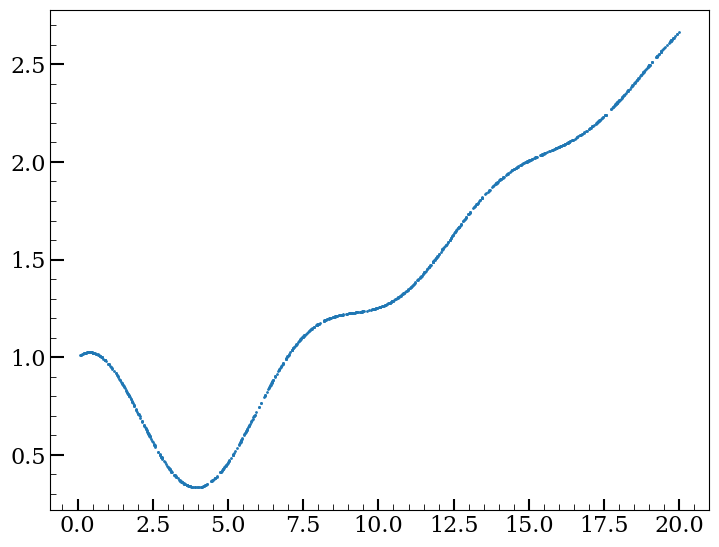

In [59]:
np.random.seed(42) #Keeping the seed for reproducibility


x_train = np.sort(np.random.uniform(0, 20, 1000)) 
# Training data from uniform distribution
x_test = np.sort(np.random.uniform(0, 20, 1000))

target_train = special.spherical_jn(0, x_train, derivative=False) + np.pi/24 * x_train
target_test = special.spherical_jn(0, x_test, derivative=False) + np.pi/24 * x_test

plt.scatter(x_train, target_train, s=1)

In [60]:
bessel_sph_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sin,cos,exp",
    'epsilon': 1e-6,
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size':2
}

Bessel_sph_0 = Problem("Bessel spherical of order 0", (x_train, target_train), (x_test, target_test), bessel_sph_0_args)

In [61]:
Bessel_sph_0.solve()

[0.2356758862733841, 5.0], 964.38, (0.316887557507 + ((-0.183931872249) * ((-0.583057701588) * X1))), 0.06
[0.17307187616825104, 6.0], 956.37, (1.906392574310 + ((-1.316529870033) * cos(((-0.106894478202) * X1)))), 0.03
[0.1690366566181183, 7.0], 958.55, (1.665159821510 + ((-1.243887186050) * sin(cos((0.122575417161 * X1))))), 0.03
[0.10487130284309387, 8.0], 952.66, ((-0.115986943245) + (1.493730425835 * (exp(((-0.619003236294) * X1)) + (0.092536643147 * X1)))), 0.01
[0.10117555409669876, 9.0], 956.24, ((-0.112444274127) + (1.675729870796 * (sin(exp(((-0.668547868729) * X1))) + (0.082381710410 * X1)))), 0.01
[9.012066584546119e-06, 10.0], 957.92, ((-0.000007443785) + (1.414577841759 * ((sin((0.999988734722 * X1)) / (1.414537072182 * X1)) + (0.092536643147 * X1)))), 0.00
[8.991617505671456e-06, 12.0], 972.79, ((-5.523121356964) + (1.414577722549 * ((3.904425859451 + (sin((0.999988734722 * X1)) / (1.414537072182 * X1))) + (0.092536643147 * X1)))), 0.00
[8.980561688076705e-06, 13.0], 970

<Axes: title={'center': 'Bessel spherical of order 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

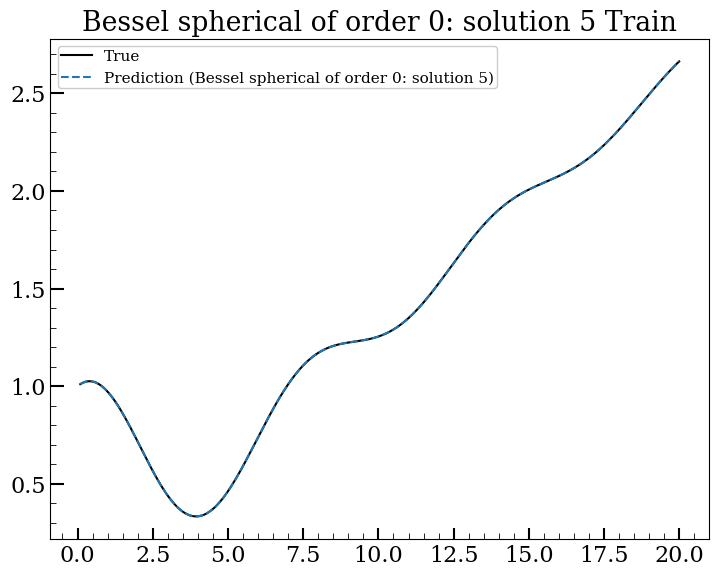

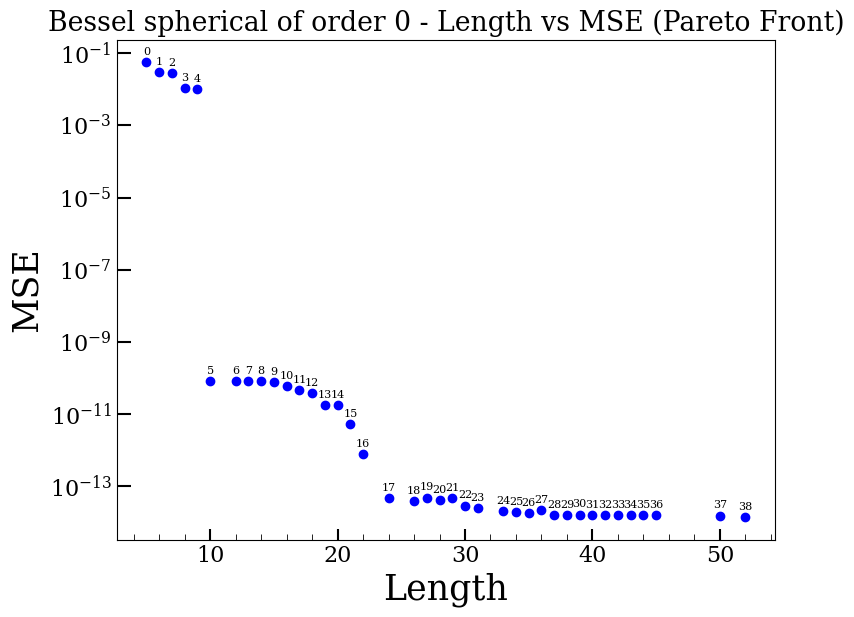

In [85]:
Bessel_sph_0.solutions[5].plot_results()
Bessel_sph_0.plot_l_vs_mse()

In [63]:
k=5
Bessel_sph_0.solutions[k].display_expression()
b_vals = Bessel_sph_0.solutions[k].extract_and_format()[1]
b_vals

<IPython.core.display.Math object>

{'b0': 0.13090028494650596,
 'b1': 7.4437850000001055e-06,
 'b2': 1.0000288218511741,
 'b3': 0.9999887347220238}

In [76]:
Solution_int_anal = Bessel_sph_0.solutions[k].int_analysis_and_modification(threshold = 1.0)

  - Rounding parameters: ['b1', 'b2', 'b3']
Creating a new Promising solution: X1*b0 + sin(X1)/X1
Re-optimizing the remaining float parameters: ['b0']
--- Starting Multi-Start Optimization (50 runs) ---
  Running optimization 1/50...
`xtol` termination condition is satisfied.
Number of iterations: 11, function evaluations: 8, CG iterations: 10, optimality: 1.09e-06, constraint violation: 0.00e+00, execution time: 0.0047 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b0        | 0.127972  | 0.1309    | 0.00292723    

  Running optimization 2/50...
`xtol` termination condition is satisfied.
Number of iterations: 11, function evaluations: 8, CG iterations: 10, optimality: 6.01e-06, constraint violation: 0.00e+00, execution time: 0.0045 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b0        | 0.135459  | 0.1309    | 0.00455934 

In [83]:
abs(Solution_int_anal.modified_parameters['b0'] - np.pi/24)/(np.pi/24) * 100

spherical bessel function of first kind of order 0


<Axes: title={'center': 'Residuals of Bessel spherical of order 0: solution 3 Train'}, xlabel='X-axis', ylabel='Residuals'>

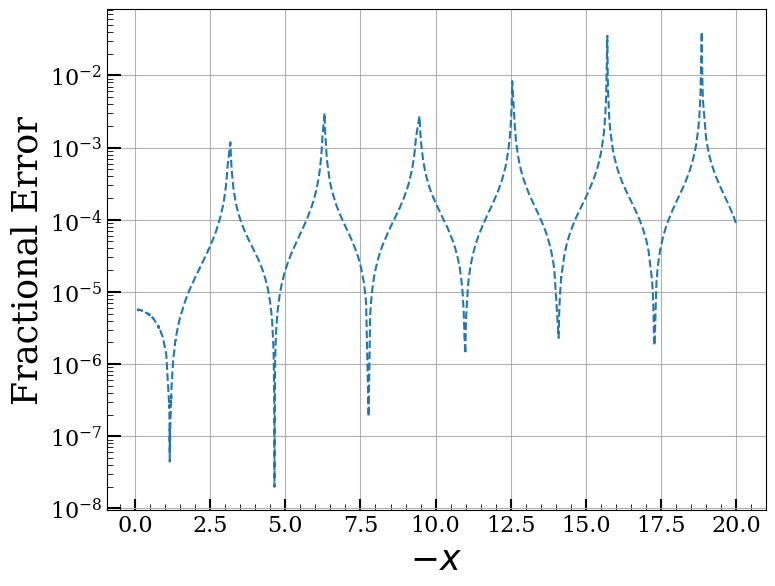

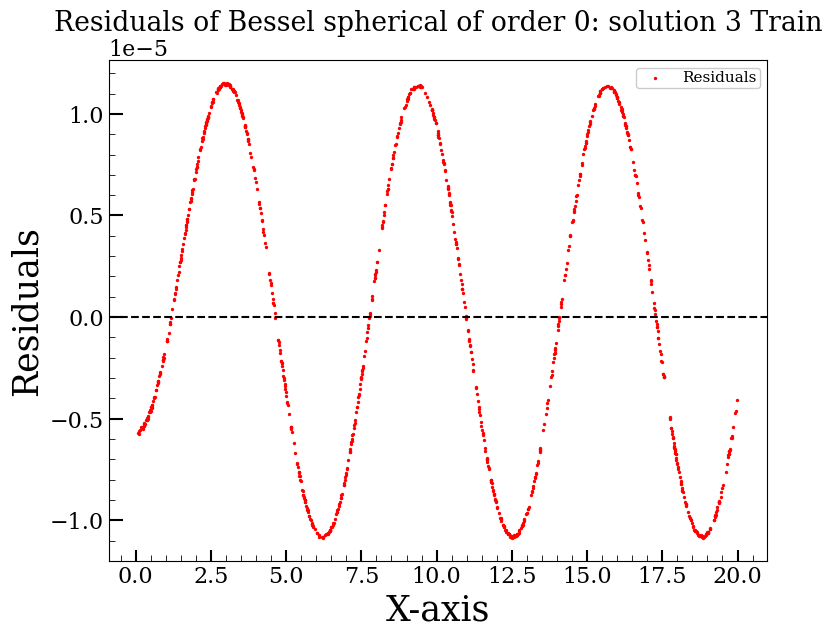

In [26]:
Bessel_sph_0.solutions[k].plot_fractional_error_bessel(x_test, order=0, kind = 'first', spherical=True)
Bessel_sph_0.solutions[k].plot_residuals()

In [66]:
Bessel_sph_0.solutions[k].compute_limits(0).evalf(), Bessel_sph_0.solutions[k].compute_limits(np.inf).evalf()

In [36]:
from BesselML import Promising_solution
Solution_pareto5 = Promising_solution(Bessel_sph_0.solutions[k].sympy_expr, (x_train, target_train), Bessel_sph_0.solutions[5], b_vals)

In [37]:
expansion = Solution_pareto5.compute_expansion_at_val(0, n=2)
constraints, const_term, linear_term = Solution_pareto5.generate_constraints_from_expansion(const_target = 1, linear_target=0)
expansion, linear_term, const_term

In [38]:
#Solution_pareto5.optimisation(constraints_eq=constraints)

final_expr, final_params = Solution_pareto5.run_multiple_optimisations(
        n_runs=30,
        k_confirm=1,
        constraints_eq=constraints
    )

--- Starting Multi-Start Optimization (30 runs) ---
  Running optimization 1/30...
`xtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 152, CG iterations: 33, optimality: 1.45e-06, constraint violation: 2.22e-16, execution time: 0.17 s.

Optimization summary:
Parameter | Old Value   | New Value  | Abs Difference
--------- | ---------   | ---------  | --------------
b0        | 2.99277e-07 | 2.8068e-11 | 2.99249e-07   
b1        | 1.0144      | 1          | 0.0144045     
b2        | 1.00254     | 1          | 0.00254467    

  Running optimization 2/30...


/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:81: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:217: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)


`xtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 160, CG iterations: 30, optimality: 2.00e-06, constraint violation: 1.11e-16, execution time: 0.17 s.

Optimization summary:
Parameter | Old Value   | New Value  | Abs Difference
--------- | ---------   | ---------  | --------------
b0        | 2.70544e-07 | 2.0825e-09 | 2.68461e-07   
b1        | 1.08635     | 1          | 0.0863452     
b2        | 0.979414    | 1          | 0.0205861     

  Running optimization 3/30...
`xtol` termination condition is satisfied.
Number of iterations: 36, function evaluations: 180, CG iterations: 35, optimality: 1.64e-06, constraint violation: 0.00e+00, execution time: 0.19 s.

Optimization summary:
Parameter | Old Value   | New Value   | Abs Difference
--------- | ---------   | ---------   | --------------
b0        | 2.58895e-07 | 9.32081e-10 | 2.57963e-07   
b1        | 1.02341     | 1           | 0.0234081     
b2        | 0.922778    | 1           | 0.0772

In [55]:
Solution_pareto5.int_analysis_and_modification(threshold=0.01)

1.187473385977665e-19 1.1973612537158017e-20
1.187473385977665e-19 1.3127133111029138e-19
1.187473385977665e-19 1.1834541890712835e-19
  - Rounding parameters: ['b0', 'b1', 'b2']
Creating a new Promising solution: sin(X1)/X1


spherical bessel function of first kind of order 0


<Axes: xlabel='$-x$', ylabel='Fractional Error'>

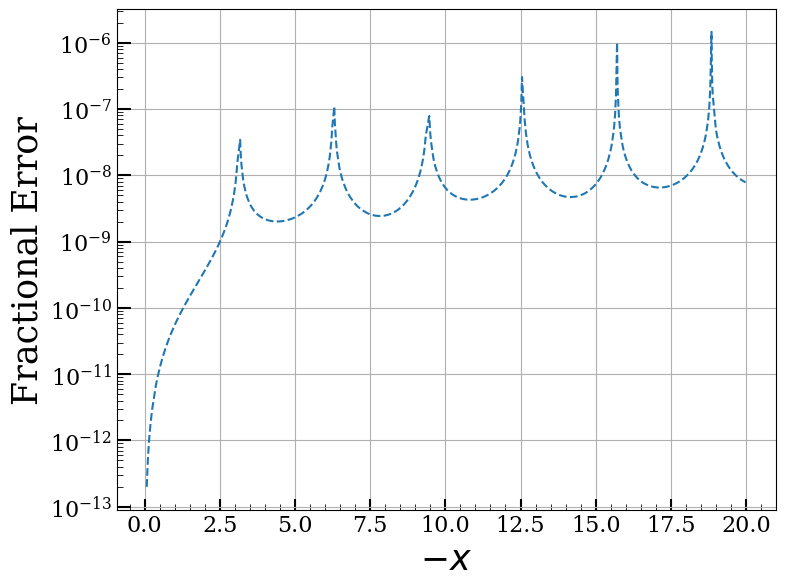

In [39]:
Solution_pareto5.plot_fractional_error_bessel(x_test, order=0, kind = 'first', spherical=True)

{'b0': np.float64(1.9070986599355717e-09),
 'b1': np.float64(1.0000000118512151),
 'b2': np.float64(0.9999999900558838)}

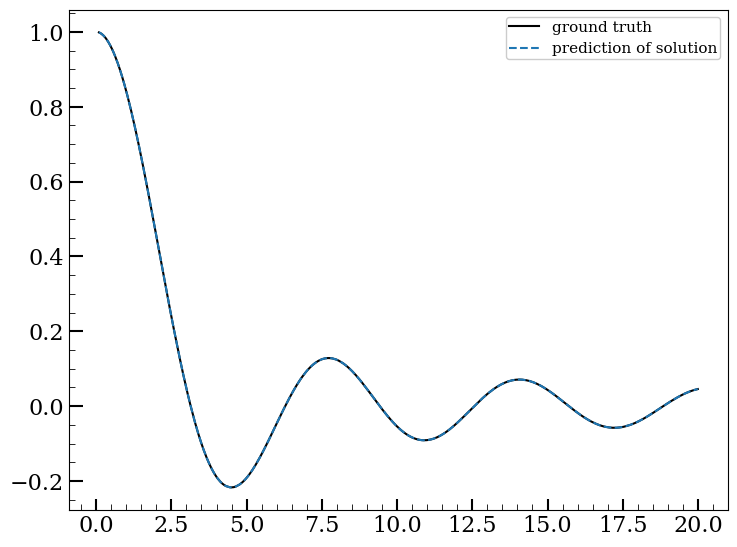

In [149]:
Solution_pareto5.plot_comparison()
str(Solution_pareto5.sympy_expr)
Solution_pareto5.modified_parameters

In [116]:
manual = '-X1*b0/(X1**2*b1 + 1)**(1/3) + b3*sin(X1*b4)/sqrt(X1**2*b1 + 1)'

#manual = str(Solution_pareto5.sympy_expr)


Manual_limiting_test = Promising_solution(sp.parsing.sympy_parser.parse_expr(manual),  (x_train, target_train), Solution_pareto5.original_solution, initial_parameters=Solution_pareto5.modified_parameters)
constraints_man, const_term_man, linear_term_man = Manual_limiting_test.generate_constraints_from_expansion(const_target = 1, linear_target=0)

In [ ]:
# from BesselML.main import create_arbitrary_constraint

# manual_expression_string = "b0/sqrt(b1)"
# manual_target_value =  0.0

# full_param_symbols = [sp.Symbol(f'b{i}') for i in range(1,5)]
# print(full_param_symbols)
# parameter_limit_inf_constraint = create_arbitrary_constraint(manual_expression_string, manual_target_value, full_param_symbols ,constraint_type='eq')

# constraints_man.append(parameter_limit_inf_constraint)

[b1, b2, b3, b4]


In [153]:
initial_params_second_opt = {
    'b1': 1.0,
    'b2': 1.0,
    'b3': 1.0,  # Start smaller for nested terms
}

Manual_limiting_test.optimisation(constraints_eq=constraints_man)

/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:81: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:217: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/home/danielct/Desktop/Internship_Oxford_

Constraint violation exceeds 'gtol'
Number of iterations: 43, function evaluations: 270, CG iterations: 81, optimality: 3.76e-08, constraint violation: 1.00e+00, execution time: 0.32 s.
Optimization did not converge: Constraint violation exceeds 'gtol'

Optimization summary:
Parameter | Old Value | New Value   | Abs Difference
--------- | --------- | ---------   | --------------
b0        | 185.014   | 0.0742747   | 184.94        
b1        | 34230.1   | 34230.4     | 0.327997      
b3        | 185.014   | 183.717     | 1.2968        
b4        | 1         | 0.000404289 | 0.999596      



(-0.0742747089846748*X1/(34230.4316019214*X1**2 + 1)**(1/3) + 183.716972563131*sin(0.000404288770647752*X1)/sqrt(34230.4316019214*X1**2 + 1),
 {'b0': np.float64(0.0742747089846748),
  'b1': np.float64(34230.43160192139),
  'b3': np.float64(183.71697256313064),
  'b4': np.float64(0.00040428877064775155)},
 {'b0': np.float64(184.93951921286776),
  'b1': np.float64(0.3279967874987051),
  'b3': np.float64(1.2967959756109622),
  'b4': np.float64(0.999595848425146)},
 np.float64(0.4802653950635547))